# Fase (1): Exploração dos dados

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('ai4i2020.csv', index_col='UDI')

In [5]:
df.head()

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
UDI,,,,,,,,,,,,,
1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product ID               10000 non-null  object 
 1   Type                     10000 non-null  object 
 2   Air temperature [K]      10000 non-null  float64
 3   Process temperature [K]  10000 non-null  float64
 4   Rotational speed [rpm]   10000 non-null  int64  
 5   Torque [Nm]              10000 non-null  float64
 6   Tool wear [min]          10000 non-null  int64  
 7   Machine failure          10000 non-null  int64  
 8   TWF                      10000 non-null  int64  
 9   HDF                      10000 non-null  int64  
 10  PWF                      10000 non-null  int64  
 11  OSF                      10000 non-null  int64  
 12  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 1.1+ MB


In [7]:
df['Product ID'].nunique()

10000

In [8]:
df.columns

Index(['Product ID', 'Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

In [9]:
df.drop(columns=(['Product ID', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']), inplace=True)

In [10]:
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
UDI,,,,,,,
1,M,298.1,308.6,1551,42.8,0,0
2,L,298.2,308.7,1408,46.3,3,0
3,L,298.1,308.5,1498,49.4,5,0
4,L,298.2,308.6,1433,39.5,7,0
5,L,298.2,308.7,1408,40.0,9,0


In [11]:
df['Machine failure'].value_counts()

Machine failure
0    9661
1     339
Name: count, dtype: int64

In [12]:
df['Machine failure'].replace([0, 1], ['no', 'yes'], inplace=True)

C:\Users\bruno\AppData\Local\Temp\ipykernel_21576\2731133256.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Machine failure'].replace([0, 1], ['no', 'yes'], inplace=True)


In [13]:
df.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000
std,2.000259,1.483734,179.284096,9.968934,63.654147
min,295.300000,305.700000,1168.000000,3.800000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  object 
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Machine failure          10000 non-null  object 
dtypes: float64(3), int64(2), object(2)
memory usage: 625.0+ KB


In [15]:
df.describe(include='object')

,Type,Machine failure
count,10000,10000
unique,3,2
top,L,no
freq,6000,9661


In [16]:
df.drop(columns='Type').groupby('Machine failure').mean()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
Machine failure,,,,,
no,299.973999,309.995570,1540.260014,39.629655,106.693717
yes,300.886431,310.290265,1496.486726,50.168142,143.781711


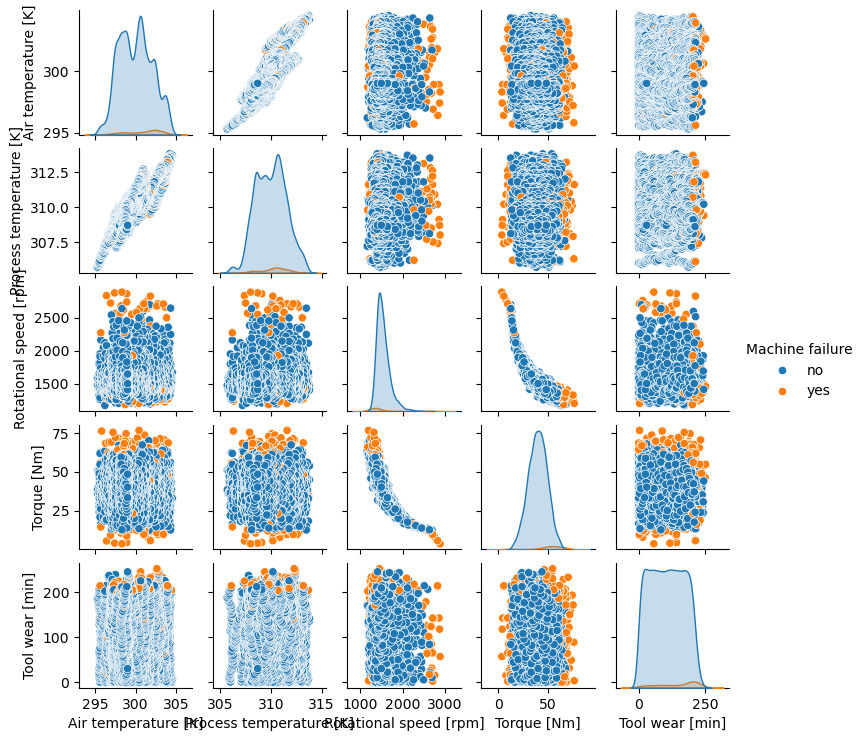

In [17]:
sns.pairplot(df, hue='Machine failure', height=1.5)

# Fase (2): Pré-processamento dos dados - transformação

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [19]:
X = df.drop(columns='Machine failure')
y = df['Machine failure']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.3,
                                                   random_state=5,
                                                   stratify=y)

In [21]:
X_train.shape, X_test.shape

((7000, 6), (3000, 6))

In [22]:
y_train.value_counts()

Machine failure
no     6763
yes     237
Name: count, dtype: int64

### Primeiro, vamos aplicar a binarização
* Obs.: Vamos utilizar o get_dummies do pandas, porém temos o OneHotEncoder do scikit-learn para serialização de modelos

In [23]:
X_train = pd.get_dummies(X_train)

In [24]:
X_train.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type_H,Type_L,Type_M
UDI,,,,,,,,
3170,300.4,309.6,1675,35.5,164,False,False,True
67,298.9,308.9,1679,28.7,181,False,False,True
1802,298.0,307.5,1427,43.6,101,False,False,True
5879,301.4,311.0,1533,45.8,125,False,True,False
3049,300.2,309.3,1532,43.2,53,False,True,False


In [25]:
X_test = pd.get_dummies(X_test)

In [26]:
X_test.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type_H,Type_L,Type_M
UDI,,,,,,,,
792,296.8,307.9,1611,35.4,72,False,True,False
4654,303.1,311.1,1594,35.5,13,False,False,True
2083,299.4,309.2,1513,36.1,212,True,False,False
3771,302.3,311.0,1609,31.0,190,False,True,False
2858,300.4,309.2,1528,37.2,228,False,False,True


### Aplicando o MinMaxScaler nos dados numéricos

In [27]:
minmax = MinMaxScaler()

In [28]:
# O fit deve ser executado apenas no conjunto de treinamento! O transform sim deve ser aplicado aos dois
minmax.fit(X_train)

MinMaxScaler()

In [29]:
# Transformação dos dados para o intervalo [0,1]
treino_norm = minmax.transform(X_train)
teste_norm = minmax.transform(X_test)

In [30]:
X_train_norm = pd.DataFrame(data=treino_norm, columns=X_train.columns)
X_test_norm = pd.DataFrame(data=teste_norm, columns=X_test.columns)

In [31]:
X_train_norm.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type_H,Type_L,Type_M
0,0.560440,0.481481,0.297186,0.432320,0.648221,0.0,0.0,1.0
1,0.395604,0.395062,0.299531,0.338398,0.715415,0.0,0.0,1.0
2,0.296703,0.222222,0.151817,0.544199,0.399209,0.0,0.0,1.0
3,0.670330,0.654321,0.213951,0.574586,0.494071,0.0,1.0,0.0
4,0.538462,0.444444,0.213365,0.538674,0.209486,0.0,1.0,0.0


# Fase (3): Treinando os modelos de machine learning

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

### Treinando os modelos

Acurácia
0.971



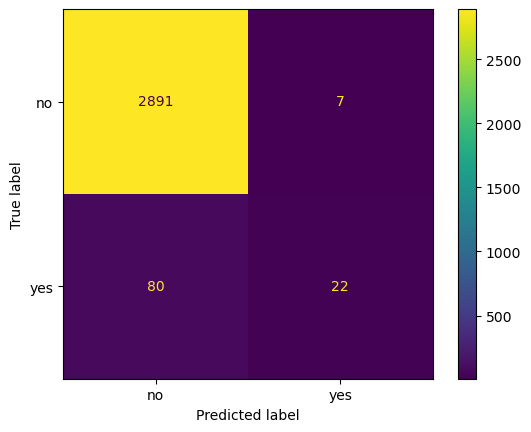

In [34]:
# k-vizinhos mais próximos
knn = KNeighborsClassifier()
knn.fit(X_train_norm, y_train)
knn_pred = knn.predict(X_test_norm)

# Mostrando os resultados
print('Acurácia')
print(accuracy_score(y_test, knn_pred))
print()
ConfusionMatrixDisplay(confusion_matrix(y_test, knn_pred), display_labels=y_test.unique()).plot()
plt.show()

Acurácia
0.975



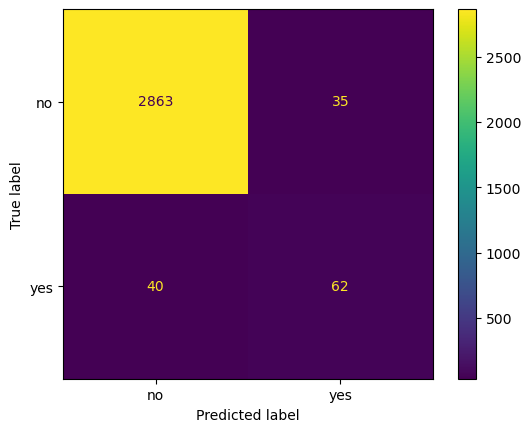

In [37]:
# Árvore de decisão
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

# Mostrando os resultados
print('Acurácia')
print(accuracy_score(y_test, dt_pred))
print()
ConfusionMatrixDisplay(confusion_matrix(y_test, dt_pred), display_labels=y_test.unique()).plot()
plt.show()

Acurácia
0.9803333333333333



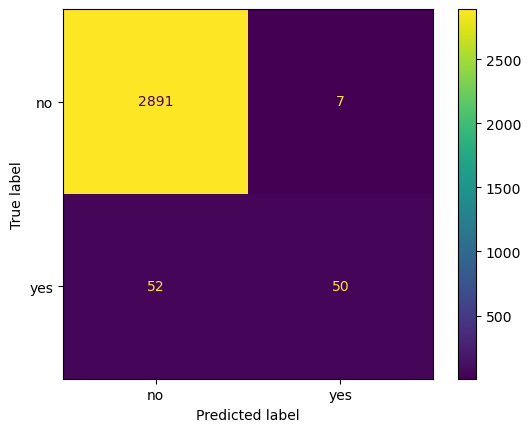

In [40]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# Mostrando os resultados
print('Acurácia')
print(accuracy_score(y_test, rf_pred))
print()
ConfusionMatrixDisplay(confusion_matrix(y_test, rf_pred), display_labels=y_test.unique()).plot()
plt.show()

Acurácia
0.9736666666666667



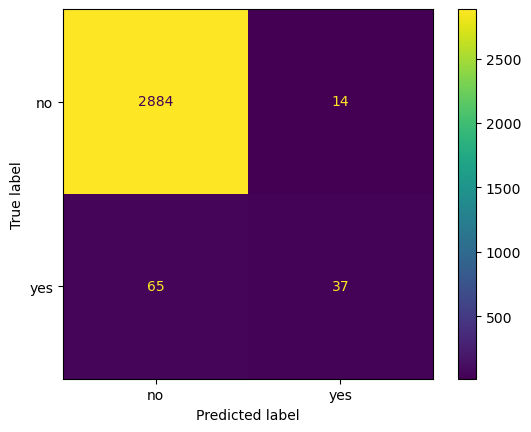

In [42]:
# Redes neurais artificiais
mlp = MLPClassifier(max_iter=500)
mlp.fit(X_train_norm, y_train)
mlp_pred = mlp.predict(X_test_norm)

# Mostrando os resultados
print('Acurácia')
print(accuracy_score(y_test, mlp_pred))
print()
ConfusionMatrixDisplay(confusion_matrix(y_test, mlp_pred), display_labels=y_test.unique()).plot()
plt.show()

In [43]:
X_train.columns

Index(['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Type_H',
       'Type_L', 'Type_M'],
      dtype='object')

Acurácia
0.959



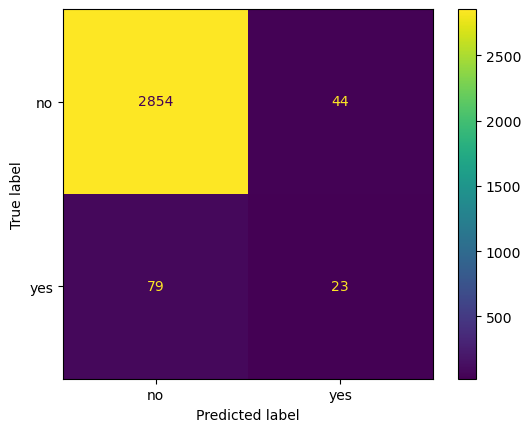

In [44]:
# Naïve Bayes

X_train_nb = X_train[['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']]
X_test_nb = X_test[['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']]

nb = GaussianNB()
nb.fit(X_train_nb, y_train)
nb_pred = nb.predict(X_test_nb)

# Mostrando os resultados
print('Acurácia')
print(accuracy_score(y_test, nb_pred))
print()
ConfusionMatrixDisplay(confusion_matrix(y_test, nb_pred), display_labels=y_test.unique()).plot()
plt.show()

# Fase (4): Realizando o balanceamento de classes com a biblioteca imbalanced-learn

In [46]:
# !pip install imblearn

In [47]:
from imblearn import under_sampling, over_sampling

In [48]:
# Conjunto original
y_train.value_counts()

Machine failure
no     6763
yes     237
Name: count, dtype: int64

In [49]:
237/6763

0.03504361969540145

In [50]:
# Subamostragem aleatória
under = under_sampling.RandomUnderSampler(sampling_strategy=0.5)

X_under, y_under = under.fit_resample(X_train, y_train)

In [52]:
X_under.shape, y_under.shape

((711, 8), (711,))

In [53]:
y_under.value_counts()

Machine failure
no     474
yes    237
Name: count, dtype: int64

In [54]:
237/474

0.5

In [55]:
# Sobreamostragem aleatória
over = over_sampling.RandomOverSampler(sampling_strategy=0.5)

X_over, y_over = over.fit_resample(X_train, y_train)

In [56]:
X_over.shape, y_over.shape

((10144, 8), (10144,))

In [57]:
y_over.value_counts()

Machine failure
no     6763
yes    3381
Name: count, dtype: int64

In [58]:
3381/6763

0.4999260683128789

### Vamos treinar um Random Forest para analisar as situações

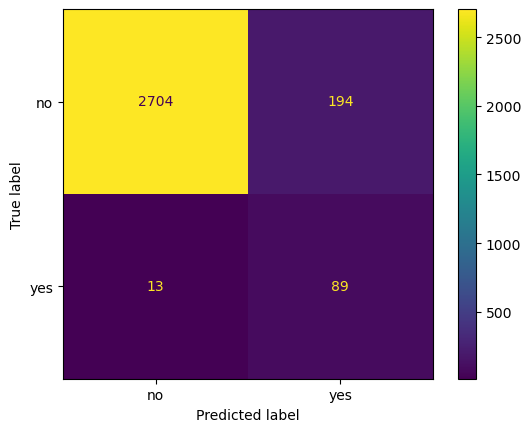

In [60]:
rf = RandomForestClassifier()

# Treinando
rf.fit(X_under, y_under)

# Recebendo as predições e mostrando o resultado
rf_pred_under = rf.predict(X_test)

ConfusionMatrixDisplay(confusion_matrix(y_test, rf_pred_under), display_labels=y_test.unique()).plot()
plt.show()

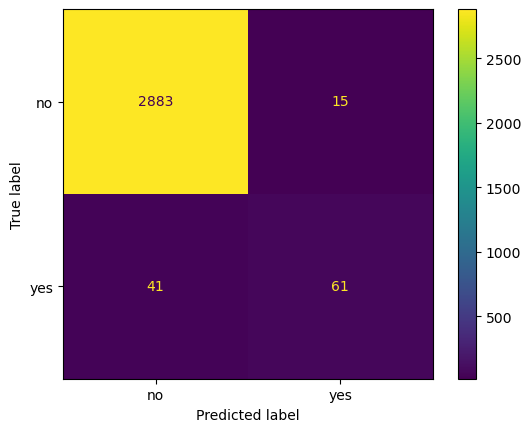

In [62]:
# Treinando com o conjunto oversampling
rf.fit(X_over, y_over)

# Recebendo as predições e mostrando o resultado
rf_pred_over = rf.predict(X_test)

ConfusionMatrixDisplay(confusion_matrix(y_test, rf_pred_over), display_labels=y_test.unique()).plot()
plt.show()